In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 2,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 4)}

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [ ]:
print("#########################################")
print(type(HPO_settings["lr"][0]))
print("#########################################")

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-05 13:53:47,316] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 4/4 [00:13<00:00,  3.33s/it]
[I 2024-07-05 13:54:03,632] Trial 0 finished with value: 94.94534188034193 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.94534188034193.
100%|██████████| 6/6 [00:19<00:00,  3.21s/it]
[I 2024-07-05 13:54:25,893] Trial 1 finished with value: 95.46641025641031 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 95.46641025641031.
100%|██████████| 5/5 [00:15<00:00,  3.17s/it]
[I 2024-07-05 13:54:44,740] Trial 2 finished with value: 95.68987179487185 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 2 with value: 95.68987179487185.
100%|██████████| 3/3 [00:09<00:00,  3.17s/it]
[I 2024-07-05 13:54:57,234] Trial 3 finished with value: 94.27064102564105 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 2 with value: 95.68987179487185.
100%|██████████| 4/4 [00:12<00:00,  3.17s/it]
[I 2024-07-05 13:55:12,902]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.17s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.18s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.18s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.19s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:15<00:00,  3.19s/it]
[I 2024-07-05 13:55:33,808] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 4/4 [00:12<00:00,  3.18s/it]
[I 2024-07-05 13:55:52,508] Trial 0 finished with value: 93.71643162393167 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 93.71643162393167.
100%|██████████| 6/6 [00:19<00:00,  3.20s/it]
[I 2024-07-05 13:56:17,683] Trial 1 finished with value: 93.30773504273509 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 93.71643162393167.
100%|██████████| 5/5 [00:15<00:00,  3.17s/it]
[I 2024-07-05 13:56:39,545] Trial 2 finished with value: 93.22222222222227 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 93.71643162393167.
100%|██████████| 3/3 [00:09<00:00,  3.17s/it]
[I 2024-07-05 13:56:55,037] Trial 3 finished with value: 93.90844017094017 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 93.90844017094017.
100%|██████████| 4/4 [00:12<00:00,  3.18s/it]
[I 2024-07-05 13:57:13,732]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.20s/it]
[I 2024-07-05 13:57:31,538] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 4/4 [00:12<00:00,  3.19s/it]
[I 2024-07-05 13:57:53,278] Trial 0 finished with value: 88.55625356125357 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 88.55625356125357.
100%|██████████| 6/6 [00:19<00:00,  3.19s/it]
[I 2024-07-05 13:58:21,387] Trial 1 finished with value: 89.40790598290596 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 89.40790598290596.
100%|██████████| 5/5 [00:15<00:00,  3.19s/it]
[I 2024-07-05 13:58:46,311] Trial 2 finished with value: 86.95688034188038 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 89.40790598290596.
100%|██████████| 3/3 [00:09<00:00,  3.18s/it]
[I 2024-07-05 13:59:04,868] Trial 3 finished with value: 90.96967236467238 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 90.96967236467238.
100%|██████████| 4/4 [00:12<00:00,  3.18s/it]
[I 2024-07-05 13:59:26,566]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.20s/it]
[I 2024-07-05 13:59:44,389] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


100%|██████████| 4/4 [00:12<00:00,  3.20s/it]
[I 2024-07-05 14:00:09,180] Trial 0 finished with value: 87.73845085470091 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 87.73845085470091.
100%|██████████| 6/6 [00:19<00:00,  3.20s/it]
[I 2024-07-05 14:00:40,367] Trial 1 finished with value: 81.2490918803419 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 87.73845085470091.
100%|██████████| 5/5 [00:15<00:00,  3.19s/it]
[I 2024-07-05 14:01:08,316] Trial 2 finished with value: 86.03529914529915 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 87.73845085470091.
100%|██████████| 3/3 [00:09<00:00,  3.18s/it]
[I 2024-07-05 14:01:29,883] Trial 3 finished with value: 87.88624999999999 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 87.88624999999999.
100%|██████████| 4/4 [00:12<00:00,  3.21s/it]
[I 2024-07-05 14:01:54,782] 

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.21s/it]
[I 2024-07-05 14:02:12,604] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


100%|██████████| 4/4 [00:12<00:00,  3.17s/it]
[I 2024-07-05 14:02:40,393] Trial 0 finished with value: 81.8203076923077 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 81.8203076923077.
100%|██████████| 6/6 [00:19<00:00,  3.20s/it]
[I 2024-07-05 14:03:14,679] Trial 1 finished with value: 83.78282905982906 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 83.78282905982906.
100%|██████████| 5/5 [00:16<00:00,  3.21s/it]
[I 2024-07-05 14:03:45,780] Trial 2 finished with value: 78.5818034188034 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 83.78282905982906.
100%|██████████| 3/3 [00:09<00:00,  3.20s/it]
[I 2024-07-05 14:04:10,476] Trial 3 finished with value: 82.90004273504272 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 83.78282905982906.
100%|██████████| 4/4 [00:12<00:00,  3.20s/it]
[I 2024-07-05 14:04:38,426] Tr

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 118
fc3 : in = 118, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 118
fc3 : in = 118, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 108
fc2 : in = 108, out = 118
fc3 : in = 118, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 140
fc2 : in = 140, out = 118
fc3 : in = 118, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.21s/it]


## Visualize results

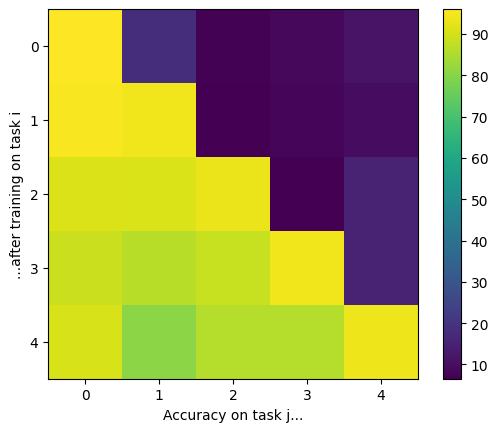

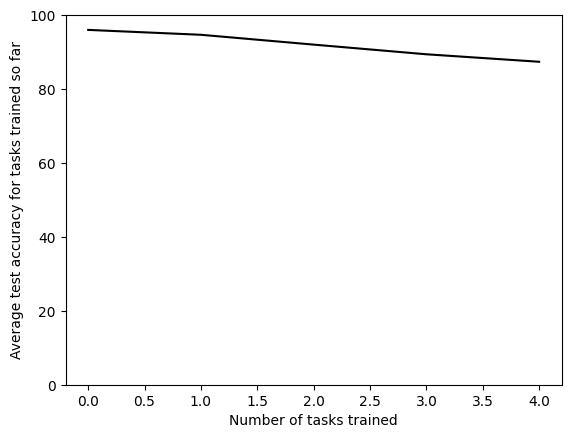

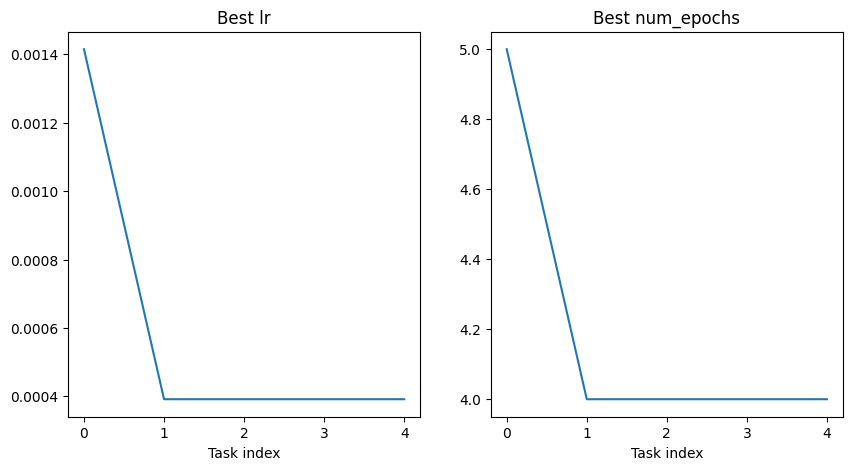

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(benchmarks_list, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 144
fc2 : in = 144, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 166
fc2 : in = 166, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 166
fc2 : in = 166, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.24s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 120
fc2 : in = 120, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.20s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.24s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.24s/it]

In and out sizes :
fc1 : in = 784, out = 180
fc2 : in = 180, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.24s/it]



BENCHMARK 4

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 137
fc2 : in = 137, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 199
fc2 : in = 199, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 199
fc2 : in = 199, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 199
fc2 : in = 199, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 199
fc2 : in = 199, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 199
fc2 : in = 199, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 301
fc2 : in = 301, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 301
fc2 : in = 301, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 301
fc2 : in = 301, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.24s/it]

In and out sizes :
fc1 : in = 784, out = 301
fc2 : in = 301, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.24s/it]

In and out sizes :
fc1 : in = 784, out = 312
fc2 : in = 312, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 312
fc2 : in = 312, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]



BENCHMARK 5

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 20%|██        | 1/5 [00:03<00:12,  3.20s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 40%|████      | 2/5 [00:06<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 60%|██████    | 3/5 [00:09<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 80%|████████  | 4/5 [00:12<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 5/5 [00:16<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 132
fc2 : in = 132, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 132
fc2 : in = 132, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 132
fc2 : in = 132, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.21s/it]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.21s/it]



--------------------------------------------------
LEARNING TASK 4


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 194
fc2 : in = 194, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.22s/it]



--------------------------------------------------
LEARNING TASK 5


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 276
fc2 : in = 276, out = 100
fc3 : in = 100, out = 10


 25%|██▌       | 1/4 [00:03<00:09,  3.22s/it]

In and out sizes :
fc1 : in = 784, out = 276
fc2 : in = 276, out = 100
fc3 : in = 100, out = 10


 50%|█████     | 2/4 [00:06<00:06,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 276
fc2 : in = 276, out = 100
fc3 : in = 100, out = 10


 75%|███████▌  | 3/4 [00:09<00:03,  3.23s/it]

In and out sizes :
fc1 : in = 784, out = 276
fc2 : in = 276, out = 100
fc3 : in = 100, out = 10


100%|██████████| 4/4 [00:12<00:00,  3.23s/it]


## Visualize validation

In [10]:
test_accs_matrix

array([[96.  , 18.24,  7.16,  8.64, 11.23],
       [95.15, 94.21,  6.55,  8.11,  9.54],
       [91.43, 91.09, 93.54,  6.81, 15.29],
       [88.92, 86.31, 88.47, 93.92, 14.94],
       [90.61, 80.53, 86.14, 86.02, 93.6 ]])

In [11]:
val_accs_matrix

array([[83.65, 83.45, 82.36, 88.63, 93.96],
       [84.38, 73.92, 87.93, 85.91, 93.45],
       [82.08, 79.49, 88.18, 87.89, 93.03],
       [82.13, 80.38, 68.43, 77.91, 93.99],
       [79.31, 80.21, 85.76, 87.03, 94.47],
       [85.86, 86.37, 87.88, 87.33, 93.85]])

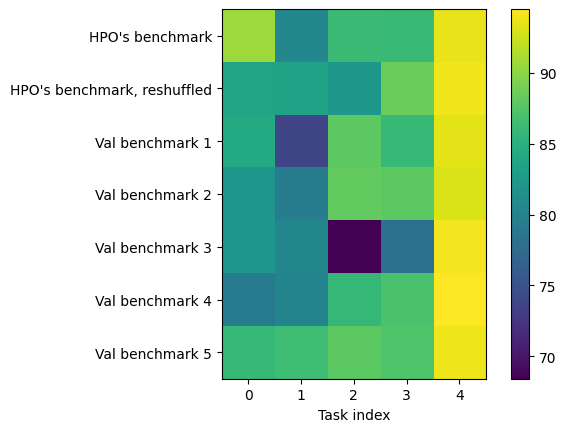

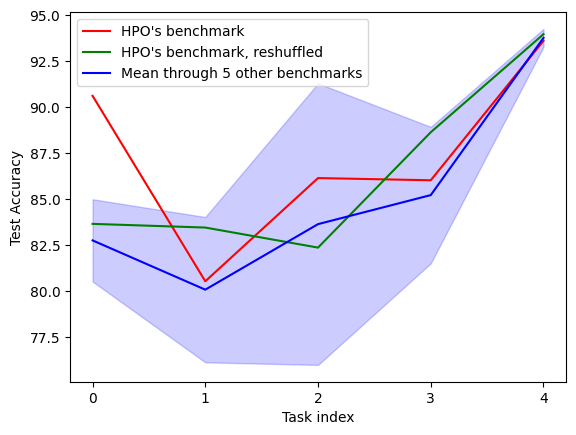

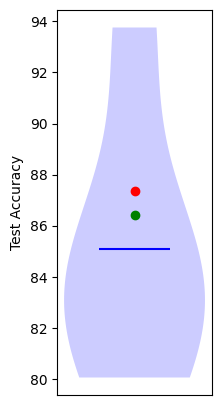

In [12]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [13]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)